## Importing libraries

In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

## Importing datasets:  

Mini-S&P500 futures

WTI oil futures

Gold futures

<!-- Aluminium futures -->

EUR/USD currency

Wheat futures

<!-- VIX futures -->

Gasoline futures

In [2]:
assets = {
    'Mini-S&P500 Futures': 'ES=F',
    'WTI Oil Futures': 'CL=F',
    'Gold Futures': 'GC=F',
    # 'Aluminium Futures': 'ALI=F',
    'EUR/USD Currency': 'EURUSD=X',
    'Wheat Futures': 'ZW=F',
    # 'VIX Futures': 'VIXY',
    'Gasoline Futures': 'RB=F'
}

start_date = '2010-01-01'  # First trading day of 2010
end_date = '2023-12-31'    # Last trading day of 2023

futures_data = yf.download(list(assets.values()), start=start_date, end=end_date)

futures_data.index = pd.to_datetime(futures_data.index)
print(futures_data.head())

[*********************100%%**********************]  6 of 6 completed

Price       Adj Close                                                  \
Ticker           CL=F     ES=F  EURUSD=X         GC=F    RB=F    ZW=F   
Date                                                                    
2010-01-01        NaN      NaN  1.438994          NaN     NaN     NaN   
2010-01-04  81.510002  1128.75  1.442398  1117.699951  2.1044  557.75   
2010-01-05  81.769997  1132.25  1.436596  1118.099976  2.1250  553.00   
2010-01-06  83.180000  1133.00  1.440403  1135.900024  2.1366  567.25   
2010-01-07  82.660004  1137.50  1.431803  1133.099976  2.1349  557.75   

Price           Close                                  ...      Open  \
Ticker           CL=F     ES=F  EURUSD=X         GC=F  ...  EURUSD=X   
Date                                                   ...             
2010-01-01        NaN      NaN  1.438994          NaN  ...  1.432706   
2010-01-04  81.510002  1128.75  1.442398  1117.699951  ...  1.431004   
2010-01-05  81.769997  1132.25  1.436596  1118.099976  

## Data Cleaning

In [5]:
na_counts = futures_data.isna().sum()
print("NA values per column:")
print(na_counts)

zero_counts = (futures_data == 0).sum()
print("Number of zeros per column:")
print(zero_counts)

Price      Ticker  
Adj Close  CL=F           0
           ES=F           0
           EURUSD=X       0
           GC=F           0
           RB=F           0
           ZW=F           0
Close      CL=F           0
           ES=F           0
           EURUSD=X       0
           GC=F           0
           RB=F           0
           ZW=F           0
High       CL=F           0
           ES=F           0
           EURUSD=X       0
           GC=F           0
           RB=F           0
           ZW=F           0
Low        CL=F           0
           ES=F           0
           EURUSD=X       0
           GC=F           0
           RB=F           0
           ZW=F           0
Open       CL=F           0
           ES=F           0
           EURUSD=X       0
           GC=F           0
           RB=F           0
           ZW=F           0
Volume     CL=F           1
           ES=F           3
           EURUSD=X    3646
           GC=F          35
           RB=F           2


In [9]:
futures_data = futures_data.dropna()
print("Cleaned Data")
print(futures_data)

cleaned_na_counts = futures_data.isna().sum()
print("TOTAL NA values after cleaning:")
print(cleaned_na_counts.sum())

Cleaned Data
Price       Adj Close                                                  \
Ticker           CL=F     ES=F  EURUSD=X         GC=F    RB=F    ZW=F   
Date                                                                    
2010-01-04  81.510002  1128.75  1.442398  1117.699951  2.1044  557.75   
2010-01-05  81.769997  1132.25  1.436596  1118.099976  2.1250  553.00   
2010-01-06  83.180000  1133.00  1.440403  1135.900024  2.1366  567.25   
2010-01-07  82.660004  1137.50  1.431803  1133.099976  2.1349  557.75   
2010-01-08  82.750000  1141.50  1.441109  1138.199951  2.1553  568.50   
...               ...      ...       ...          ...     ...     ...   
2023-12-22  73.559998  4805.25  1.100619  2057.100098  2.1301  616.25   
2023-12-26  75.570000  4825.00  1.102026  2058.199951  2.1583  636.25   
2023-12-27  74.110001  4833.50  1.104301  2081.899902  2.1550  623.00   
2023-12-28  71.769997  4832.25  1.110864  2073.899902  2.0852  631.50   
2023-12-29  71.650002  4820.00  1.1068

Investigating why ALI=F and VIXY have too many NaN values.

In [10]:
# # Visualize NA occurrences
# futures_data.adj['ALI=F'].isna().astype(int).plot(title='ALI=F NA Occurrences', figsize=(12, 6))
# plt.show()

# futures_data.Close['VIXY'].isna().astype(int).plot(title='VIXY NA Occurrences', figsize=(12, 6))
# plt.show()

# Identify rows with NA values for ALI=F and VIXY
# ali_na_dates = futures_data[futures_data.Close['ALI=F'].isna()].index
# vixy_na_dates = futures_data[futures_data.Close['VIXY'].isna()].index

# print("Dates with NA values for ALI=F:")
# print(ali_na_dates)

# print("Dates with NA values for VIXY:")
# print(vixy_na_dates)

# ali_na_data = futures_data.loc[ali_na_dates, ['Close']]
# vixy_na_data = futures_data.loc[vixy_na_dates, ['Close']]

# print("ALI=F data on dates with NA Close values:")
# # print(ali_na_data.isna().sum())

# print("VIXY data on dates with NA Close values:")
# print(vixy_na_data.isna().sum())

## Split data into training and testing (test data starts from 2020)

In [14]:
# Define the start date for the test set
test_start_date = '2020-01-02'

# Split the data into training and testing sets
train_data = futures_data[futures_data.index < test_start_date]  # Data before 2 Jan 2020
test_data = futures_data[futures_data.index >= test_start_date]  # Data from 2 Jan 2020 onwards

# Check the shapes of the resulting datasets
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (2507, 36)
Testing data shape: (1006, 36)
Price       Adj Close                                                  \
Ticker           CL=F     ES=F  EURUSD=X         GC=F    RB=F    ZW=F   
Date                                                                    
2020-01-02  61.180000  3259.00  1.122083  1524.500000  1.7042  560.25   
2020-01-03  63.049999  3235.50  1.117144  1549.199951  1.7488  554.50   
2020-01-06  63.270000  3243.50  1.116196  1566.199951  1.7544  550.00   
2020-01-07  62.700001  3235.25  1.119799  1571.800049  1.7222  550.25   
2020-01-08  59.610001  3260.25  1.115474  1557.400024  1.6488  552.75   
...               ...      ...       ...          ...     ...     ...   
2023-12-22  73.559998  4805.25  1.100619  2057.100098  2.1301  616.25   
2023-12-26  75.570000  4825.00  1.102026  2058.199951  2.1583  636.25   
2023-12-27  74.110001  4833.50  1.104301  2081.899902  2.1550  623.00   
2023-12-28  71.769997  4832.25  1.110864  2073.899902  2.0852

Exploratory Data Analysis (To help decide strategies)

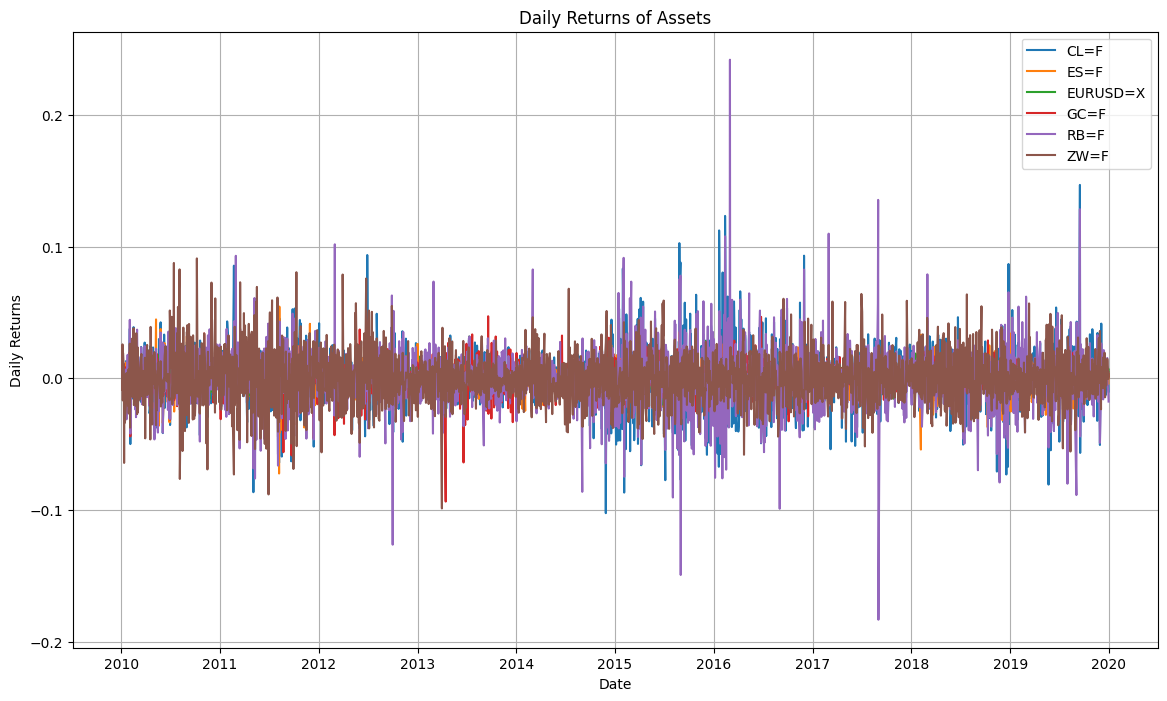

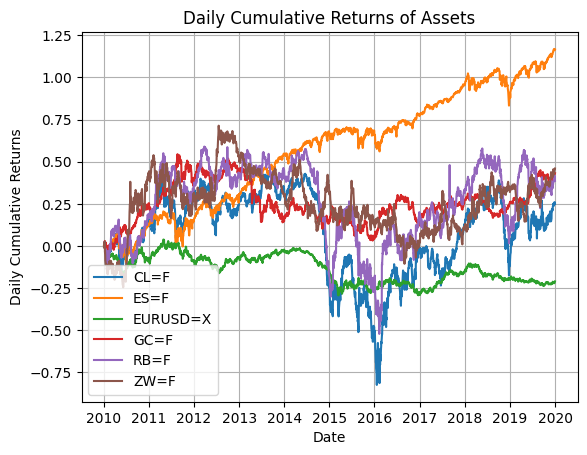

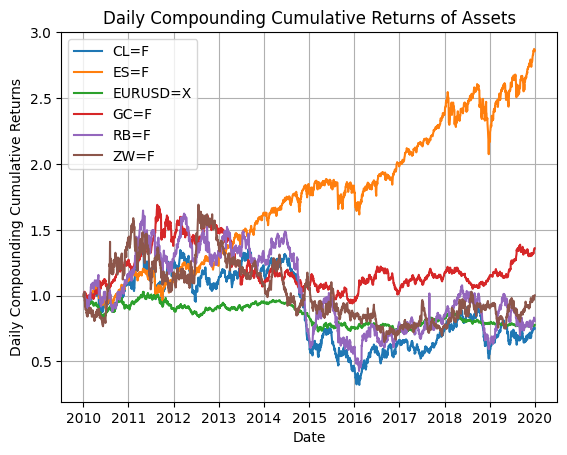

In [25]:
returns_data = train_data['Close'].pct_change().dropna()
# print(returns_data)
cum_returns_data = returns_data.cumsum()
compounding_cum_returns_data = (1+returns_data).cumprod()



plt.figure(figsize=(14, 8))

# Printing daily returns of the assets (non cumulative and non compounding)
for ticker in returns_data.columns:
    plt.plot(returns_data.index, returns_data[ticker], label=ticker)

plt.title('Daily Returns of Assets (non cumulative and non compounding)')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid(True)
plt.show()

# Printing cumulative daily returns of the assets (non compounding)
for ticker in returns_data.columns:
    plt.plot(cum_returns_data.index, cum_returns_data[ticker], label=ticker)

plt.title('Daily Returns of Assets (cumulative and non compounding)')
plt.xlabel('Date')
plt.ylabel('Cumulative Daily Returns')
plt.legend()
plt.grid(True)
plt.show()

# Printing compounding cumulative daily returns of the assets
for ticker in returns_data.columns:
    plt.plot(compounding_cum_returns_data.index, compounding_cum_returns_data[ticker], label=ticker)

plt.title('Daily Returns of Assets (cumulative and compounding)')
plt.xlabel('Date')
plt.ylabel('Compounding Cumulative Daily Returns')
plt.legend()
plt.grid(True)
plt.show()

Setting Benchmark as an equally weighted (across all assets) Buy and Hold strategy. Other Benchmarks? Why did I choose this benchmark?

In [30]:
mean(returns_data)

NameError: name 'mean' is not defined

Strategy 1: Time-series Micro Alpha

Strategy 2: Cross-Sectional Micro Alpha

Strategy 3: Timing Micro Alpha

Strategy 4: ML Micro Alpha

Combining strategies method 1: Equal weighting of strategies

Combining strategies method 2: Manual weighting of strategies

Combining strategies method 3: Automated (Mean-variance) weighting of strategy

Evaluate strategies on training data: CAGR, Sharpe/Sortino Ratio with/without rf rate, Alpha, Beta, Profit factor, Average/Max Drawdown, Profit per trade. Make a dataframe for these metrics, interpret them, make predictions about test data. Compare strategies with the benchmark and against each other.

After you have done your research, will your researched strategies still deliver acceptable performance from 2 Jan 2020 onwards?

Once your simulation is ready, run a study of transaction costs. For simplicity, apply the same level of transaction costs to each contract. And answer the following questions.

What is the highest level of transaction costs your strategy can tolerate?
Could this be improved by reducing the turnover?
How much leverage would you tolerate?

Apply strategies on test data

Evaluate strategies on testing data: CAGR, Sharpe/Sortino Ratio with/without rf rate, Alpha, Beta, Profit factor, Average/Max Drawdown, Profit per trade. Make a dataframe for these metrics, interpret them, make predictions about test data. Compare strategies with the benchmark and against each other.

Does the strategy still hold in the new market regime?
Is it still viable after transaction costs?

Reflect on what you have learned. Write down at least 10 insights from your research.